In [9]:
!pip install -U imbalanced-learn


You should consider upgrading via the 'C:\Users\acer6\OneDrive\Bureau\p7\p7-ml\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_selector

# Feature Selection
import shap

<div style="background-color:#9dedde; padding: 10px">
<h2>Chargement des données</h2>
</div>

In [11]:
df = pd.read_csv('app_train_sample_clean.csv')
df.head(5)


,TYPE_CONTRAT,AGE,DATE_NAISSANCE,ID_CLIENT,CIBLE,STATUT_FAMILIAL,JOURS_EMPLOI,TOTAL_CREDIT,REMB_MENSUEL,PROPRIETAIRE_BIEN_IMMO,CNT_FAM_MEMBERS,TYPE_REVENUS,GENRE,MONTANT_PRIX_BIENS,NIVEAU_EDUCATION,REVENU_TOTAL,SOURCE_EXTERNE_2,SOURCE_EXTERNE_3,PROPRIETAIRE_VOITURE
0,Cash loans,48,1976-02-25,196888,0,Married,-152,1350000.0,39604.5,Y,2.0,Working,F,1350000.0,Higher education,135000.0,0.761443,0.757069,N
1,Cash loans,55,1969-09-19,101392,0,Civil marriage,-717,573628.5,24435.0,Y,2.0,Working,F,463500.0,Higher education,81000.0,0.396825,0.818248,Y
2,Cash loans,26,1998-10-25,435135,0,Single / not married,-667,298512.0,19948.5,N,1.0,Working,F,270000.0,Higher education,112500.0,0.385353,NaN,N
3,Cash loans,30,1994-09-10,396314,0,Married,-1825,218016.0,17352.0,N,2.0,Working,M,180000.0,Higher education,81000.0,0.545649,0.336062,N
4,Cash loans,45,1979-12-31,341153,1,Married,-159,1006920.0,42790.5,Y,2.0,Working,F,900000.0,Secondary / secondary special,90000.0,0.444443,0.673830,N


In [12]:
df.shape

(30751, 19)

In [13]:
df.tail()

,TYPE_CONTRAT,AGE,DATE_NAISSANCE,ID_CLIENT,CIBLE,STATUT_FAMILIAL,JOURS_EMPLOI,TOTAL_CREDIT,REMB_MENSUEL,PROPRIETAIRE_BIEN_IMMO,CNT_FAM_MEMBERS,TYPE_REVENUS,GENRE,MONTANT_PRIX_BIENS,NIVEAU_EDUCATION,REVENU_TOTAL,SOURCE_EXTERNE_2,SOURCE_EXTERNE_3,PROPRIETAIRE_VOITURE
30746,Cash loans,42,1982-10-05,311641,0,Married,-914,808650.0,23773.5,N,3.0,State servant,F,675000.0,Secondary / secondary special,90000.0,0.621768,0.759712,N
30747,Cash loans,38,1986-03-14,151728,1,Single / not married,-7215,85500.0,9108.0,Y,1.0,Working,M,85500.0,Secondary / secondary special,40500.0,0.393861,NaN,N
30748,Revolving loans,44,1980-08-20,384640,0,Married,365243,247500.0,12375.0,Y,2.0,Pensioner,F,247500.0,Higher education,69750.0,0.673987,NaN,Y
30749,Cash loans,61,1963-10-20,437079,0,Widow,365243,270000.0,9828.0,Y,1.0,Pensioner,F,270000.0,Secondary / secondary special,36000.0,0.546689,NaN,N
30750,Cash loans,59,1965-06-17,389739,0,Widow,-974,1288350.0,37053.0,Y,1.0,Working,F,1125000.0,Secondary / secondary special,148500.0,0.670388,0.157595,Y


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TYPE_CONTRAT            30751 non-null  object 
 1   AGE                     30751 non-null  int64  
 2   DATE_NAISSANCE          30751 non-null  object 
 3   ID_CLIENT               30751 non-null  int64  
 4   CIBLE                   30751 non-null  int64  
 5   STATUT_FAMILIAL         30751 non-null  object 
 6   JOURS_EMPLOI            30751 non-null  int64  
 7   TOTAL_CREDIT            30751 non-null  float64
 8   REMB_MENSUEL            30751 non-null  float64
 9   PROPRIETAIRE_BIEN_IMMO  30751 non-null  object 
 10  CNT_FAM_MEMBERS         30751 non-null  float64
 11  TYPE_REVENUS            30751 non-null  object 
 12  GENRE                   30751 non-null  object 
 13  MONTANT_PRIX_BIENS      30727 non-null  float64
 14  NIVEAU_EDUCATION        30751 non-null

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Analyse exploratoire</b>
    </h2>
</div>


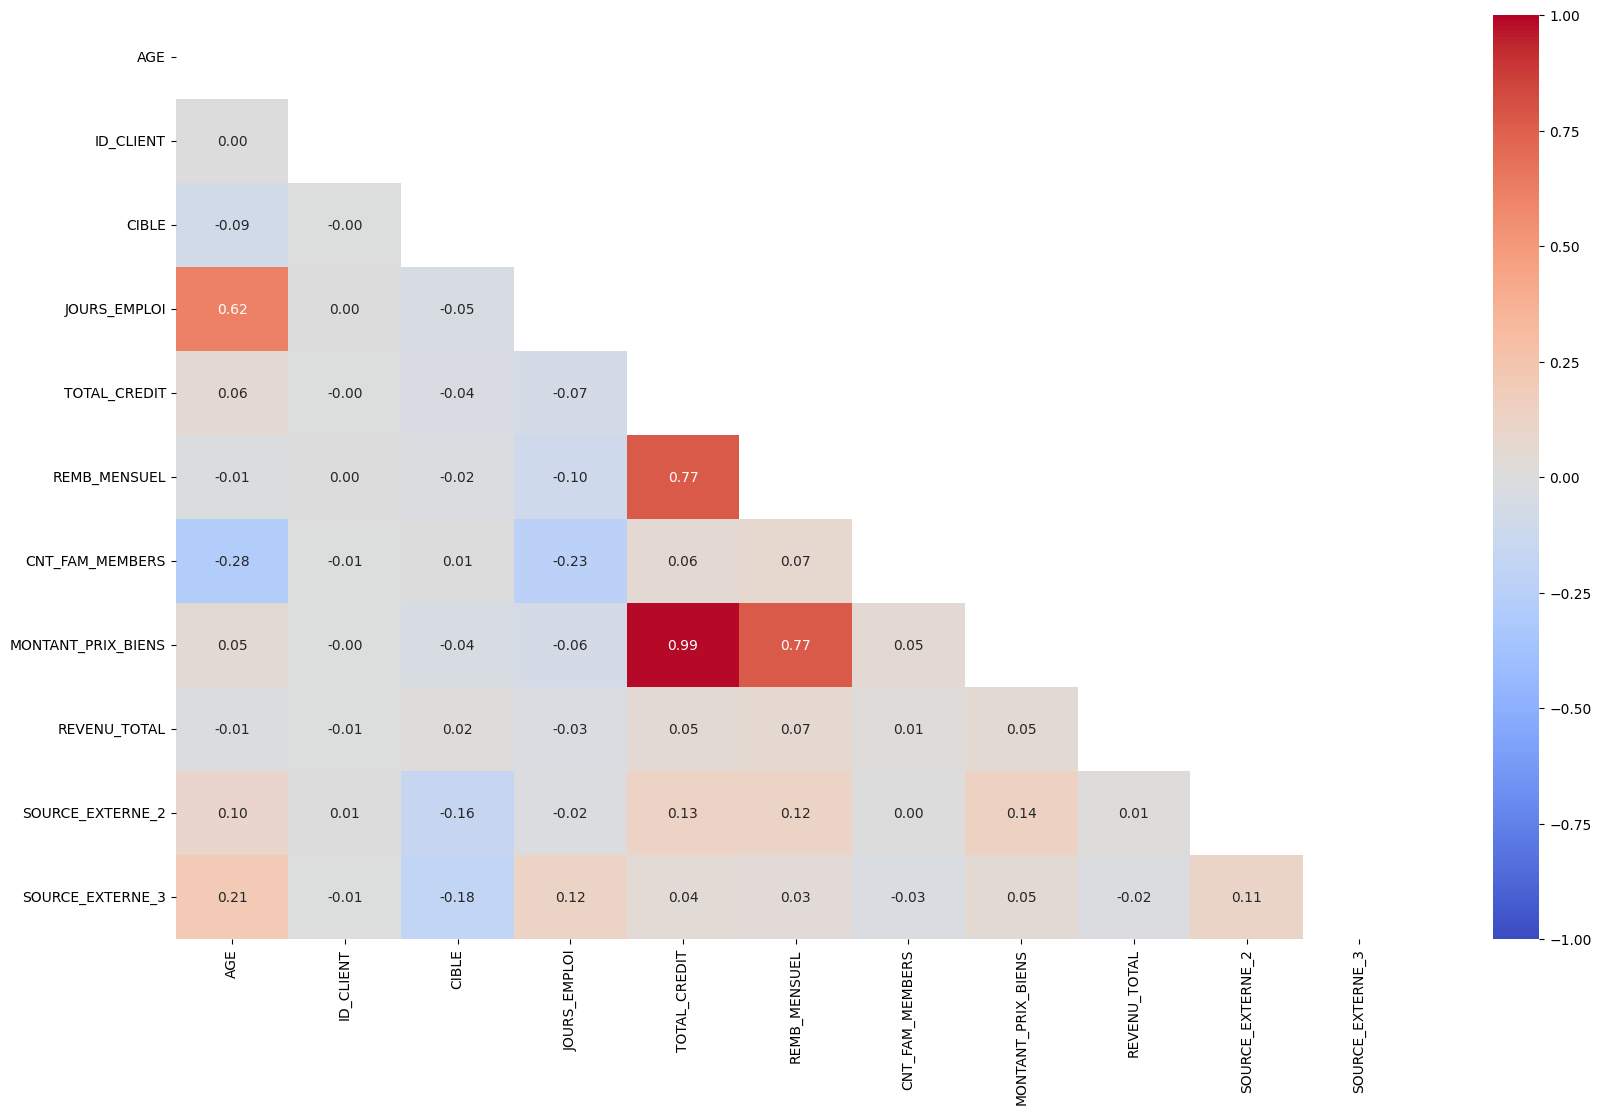

In [15]:
plt.figure(figsize=(20,12))
corr = df.select_dtypes(include=('float64', 'int64')).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,vmin = -1, vmax =1, cmap ='coolwarm', fmt = ".2f", mask = mask, annot=True)
plt.show()

In [16]:
df = df.sample(frac=0.10)

In [17]:
#df_1 =df.loc[df.CIBLE==1]
#df_1

In [18]:
#n = df_1.shape[0]

In [19]:
#df_0 = df.loc[df.CIBLE==0]
#df_0 = df_0.sample(n)
#df_0

In [20]:
#df = pd.concat([df_0, df_1], axis=0, ignore_index = True)
#df

In [21]:
y = df['CIBLE']

In [22]:
y.shape

(3075,)

In [23]:
#Dataframe des autres features, supression des targets
x_train = df.copy()

col_cible = ['ID_CLIENT', 'CIBLE', 'DATE_NAISSANCE']
x_train.drop(col_cible, axis=1, inplace=True)
x_train

,TYPE_CONTRAT,AGE,STATUT_FAMILIAL,JOURS_EMPLOI,TOTAL_CREDIT,REMB_MENSUEL,PROPRIETAIRE_BIEN_IMMO,CNT_FAM_MEMBERS,TYPE_REVENUS,GENRE,MONTANT_PRIX_BIENS,NIVEAU_EDUCATION,REVENU_TOTAL,SOURCE_EXTERNE_2,SOURCE_EXTERNE_3,PROPRIETAIRE_VOITURE
4429,Cash loans,62,Separated,365243,225000.0,8613.0,Y,1.0,Pensioner,F,225000.0,Secondary / secondary special,157500.0,0.647977,0.468660,N
15262,Cash loans,33,Married,-3211,284400.0,22599.0,N,2.0,Working,F,225000.0,Secondary / secondary special,540000.0,0.479251,0.295583,N
13371,Cash loans,27,Married,-649,225000.0,10489.5,N,2.0,Working,M,225000.0,Secondary / secondary special,117000.0,0.667302,0.780144,Y
19747,Cash loans,40,Married,-5426,760122.0,24651.0,N,2.0,State servant,F,544500.0,Secondary / secondary special,144000.0,0.181631,0.770087,N
7011,Cash loans,43,Married,-6518,381528.0,13833.0,N,3.0,Working,F,315000.0,Secondary / secondary special,90000.0,0.716825,0.614414,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5187,Cash loans,59,Single / not married,365243,555273.0,16042.5,Y,1.0,Pensioner,F,463500.0,Secondary / secondary special,180000.0,0.687093,0.657784,N
11115,Cash loans,29,Married,-398,227520.0,16618.5,N,2.0,Working,M,180000.0,Secondary / secondary special,135000.0,0.536989,NaN,N
14790,Cash loans,33,Married,-3599,729792.0,23044.5,Y,2.0,Commercial associate,F,630000.0,Higher education,202500.0,0.673372,0.766234,N
16813,Cash loans,29,Married,-709,381528.0,17914.5,Y,2.0,Working,F,315000.0,Higher education,49500.0,0.223517,NaN,N


In [24]:
x_train.shape

(3075, 16)

In [25]:
categ_col = x_train.select_dtypes(['object']).columns
num_col = x_train.select_dtypes(['float64', 'int64']).columns

In [26]:
categ_col

Index(['TYPE_CONTRAT', 'STATUT_FAMILIAL', 'PROPRIETAIRE_BIEN_IMMO',
       'TYPE_REVENUS', 'GENRE', 'NIVEAU_EDUCATION', 'PROPRIETAIRE_VOITURE'],
      dtype='object')

In [27]:
categ_col.shape

(7,)

In [28]:
num_col

Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='object')

In [29]:
num_col.shape

(9,)

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Modélisation</b>
    </h2>
</div>


In [30]:
# Créer les transformateurs
numeric_transformer = make_pipeline(
    SimpleImputer(strategy='mean'), 
    StandardScaler()
)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    OneHotEncoder(handle_unknown='ignore')
)


preprocessor_1 = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_col),
        ("cat", categorical_transformer, categ_col)
    ],
    remainder="drop"
)


#preprocessor_2 = ColumnTransformer(
   # transformers=[
       # ("num", numeric_transformer, num_col),
     #   ("cat", categorical_transformer, categ_col),],
  #  remainder="drop")


pipeline = Pipeline(
    steps=[("preprocessor", preprocessor_1),('sampler', RandomUnderSampler()), ("estimator", RandomForestClassifier()),])


In [31]:
def resultize(grid):
    res = pd.DataFrame(grid.cv_results_)  # Utilisez la méthode cv_results_()
    cols = [i for i in res.columns if "split" not in i]
    res = res.loc[:, cols]
    res.sort_values("mean_test_score", ascending=False, inplace=True)
    return res

In [32]:
param_grid = {'estimator' : [LogisticRegression(), DummyClassifier(), RandomForestClassifier() ],
             #'preprocessor__num__simpleimputer__strategy': ['mean', 'median'], 
             #'preprocessor__cat__simpleimputer__strategy': ['most_frequent', 'constant', 'mean'], 
             #'estimator__C': [0.1, 1.0, 10.0] 
}

In [33]:
from sklearn.metrics import get_scorer_names

In [34]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [35]:
grid_1 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, return_train_score=True, verbose =2, scoring = 'f1')


In [36]:
print("Pipeline Steps:", pipeline.named_steps)

grid_1.fit(x_train, y)

Pipeline Steps: {'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['TYPE_CONTRAT', 'STATUT

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='objec...
                                                                         Index(['TYPE_CONTRAT', 'STATUT_FAMILIAL', 'PROPRIETAIRE_BIEN_IMMO',
       'TYPE_REVENUS', 'GENRE', 'NIVEAU_EDUCATION', 'PROPRIETAIRE_VOITURE'],
      dtype='object'))])),
                                       ('sampler', RandomUnderSampler()),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [LogisticRegression(), DummyClassifier(),
                                       RandomForestClassifier()]},
             return_train_score=True, scoring='f1', verbose=2)

In [37]:
resultize(grid_1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,0.062214,0.004616,0.016304,0.001161,LogisticRegression(),{'estimator': LogisticRegression()},0.205156,0.021713,1,0.226162,0.011982
2,0.318390,0.011636,0.025213,0.003121,RandomForestClassifier(),{'estimator': RandomForestClassifier()},0.187311,0.022326,2,0.308770,0.005586
1,0.038613,0.006484,0.016205,0.001722,DummyClassifier(),{'estimator': DummyClassifier()},0.000000,0.000000,3,0.000000,0.000000


In [38]:
y.value_counts(normalize = True)

CIBLE
0    0.924878
1    0.075122
Name: proportion, dtype: float64

In [39]:
best_model = grid_1.best_estimator_

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [41]:
# Séparez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size=0.2, random_state=42)


In [42]:
# Utilisez GridSearchCV pour ajuster votre modèle
grid_1 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, return_train_score=True, verbose=2, scoring='f1')
grid_1.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='objec...
                                                                         Index(['TYPE_CONTRAT', 'STATUT_FAMILIAL', 'PROPRIETAIRE_BIEN_IMMO',
       'TYPE_REVENUS', 'GENRE', 'NIVEAU_EDUCATION', 'PROPRIETAIRE_VOITURE'],
      dtype='object'))])),
                                       ('sampler', RandomUnderSampler()),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [LogisticRegression(), DummyClassifier(),
                                       RandomForestClassifier()]},
             return_train_score=True, scoring='f1', verbose=2)

In [43]:
df.columns.tolist()

['TYPE_CONTRAT',
 'AGE',
 'DATE_NAISSANCE',
 'ID_CLIENT',
 'CIBLE',
 'STATUT_FAMILIAL',
 'JOURS_EMPLOI',
 'TOTAL_CREDIT',
 'REMB_MENSUEL',
 'PROPRIETAIRE_BIEN_IMMO',
 'CNT_FAM_MEMBERS',
 'TYPE_REVENUS',
 'GENRE',
 'MONTANT_PRIX_BIENS',
 'NIVEAU_EDUCATION',
 'REVENU_TOTAL',
 'SOURCE_EXTERNE_2',
 'SOURCE_EXTERNE_3',
 'PROPRIETAIRE_VOITURE']

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>First Approch</b>
    </h2>
</div>


In [44]:
#y_pred = notre prediction finale 'oui ou non'
#y_true = CIBLE

In [45]:
#def calcul_benef(total_credit, y_true, y_pred, taux_interet=0.04):
#    'on accorde un crédit, ou on refuse'
#    if y_pred : #cas où on refuse le crédit
#        return 0
#    else :
#        if y_true  :#On accorde le crédit donc on fait un bénéfice
#            total_credit * taux_interet 
#            return total_credit * taux_interet
#        if  y_true ==1 : 
#             return -total_credit *0.25 #On met un - car on a perdu le crédit accordé non remboursé
    
    
    
def calcul_benef(montant, y_true, y_pred, taux=0.04, default_rate=1):

    if y_pred :
        return 0
    
    if y_true : 
        return -default_rate * montant

    return montant * taux

In [46]:
calcul_benef(1000, 0, 0)

40.0

In [47]:
calcul_benef(1000, 1, 0)

-1000

In [48]:
calcul_benef(1000, 1, 1)

0

In [49]:
def calcul_benef_bis(row, taux_interet=0.04):
    if row['CIBLE'] == 1:  # cas où on refuse le crédit
        return pd.Series({'benef': 0, 'pertes': -row['TOTAL_CREDIT'] * 0.25})  # Pertes avec un signe négatif
    else:
        if row['CIBLE'] == 0:  # On accorde le crédit donc on fait un bénéfice
            benef = row['TOTAL_CREDIT'] * taux_interet
            return pd.Series({'benef': benef, 'pertes': 0})
        else:
            pertes = -row['TOTAL_CREDIT'] * 0.25  # On met un - car on a perdu le crédit accordé non remboursé
            return pd.Series({'benef': 0, 'pertes': pertes})


In [50]:
df[['benef', 'pertes']] = df.apply(calcul_benef_bis, axis=1)

In [51]:
df[['TOTAL_CREDIT', 'CIBLE', 'benef', 'pertes']]

,TOTAL_CREDIT,CIBLE,benef,pertes
4429,225000.0,0,9000.00,0.0
15262,284400.0,1,0.00,-71100.0
13371,225000.0,0,9000.00,0.0
19747,760122.0,1,0.00,-190030.5
7011,381528.0,0,15261.12,0.0
...,...,...,...,...
5187,555273.0,0,22210.92,0.0
11115,227520.0,0,9100.80,0.0
14790,729792.0,0,29191.68,0.0
16813,381528.0,0,15261.12,0.0


In [52]:
y_pred_list = grid_1.predict(X_test)
y_pred_list 

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,

In [53]:
y_true_list = y_test.values
y_true_list

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [54]:
montant_list = X_test.loc[:, 'TOTAL_CREDIT'].values
montant_list

array([ 729922.5,  755190. ,  763870.5, 1012653. ,  277969.5,  903289.5,
       1224000. ,  450000. ,  150948. , 1260000. ,  450000. ,  291915. ,
        225000. ,   91692. ,  314100. ,  180000. ,  253737. ,  956574. ,
        450000. ,  536917.5,  427500. ,  258709.5,  545040. , 1350000. ,
        521280. ,  180000. ,  900000. , 1305000. ,  874152. ,  356580. ,
       2250000. ,  286704. ,  270000. ,  450000. , 1280884.5,  225000. ,
        755190. ,  225000. ,  598486.5,  971280. , 1546020. ,  593010. ,
        328405.5,  145557. ,  254700. ,  315000. ,  381528. ,  536917.5,
        675000. ,  139230. ,  765000. , 1040985. ,  229230. ,  161730. ,
         49752. ,  263686.5,  675000. ,  808650. , 1035832.5,  512338.5,
        535306.5,  486000. ,  675000. , 1418692.5,  808650. ,  260640. ,
        263686.5,  312768. ,  545040. , 2250000. ,  298512. ,  481495.5,
        239850. ,  555273. ,  398160. ,  301464. ,  450000. ,  621900. ,
        677664. ,  495000. ,  675000. ,   76410. , 

In [55]:
l1 = ["a", "b"]
l2 = [0 ,1]

In [56]:
v = 0
for m, y_true, y_pred in zip(montant_list, y_true_list, y_pred_list):
    v += calcul_benef(m, y_true=y_true, y_pred=y_pred)
round(v/1_000_000,2) 

-0.12

In [57]:
sum(montant_list/1_000_000).round(2)

370.29

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Prédict Proba</b>
    </h2>
</div>


In [58]:
X_test

,TYPE_CONTRAT,AGE,STATUT_FAMILIAL,JOURS_EMPLOI,TOTAL_CREDIT,REMB_MENSUEL,PROPRIETAIRE_BIEN_IMMO,CNT_FAM_MEMBERS,TYPE_REVENUS,GENRE,MONTANT_PRIX_BIENS,NIVEAU_EDUCATION,REVENU_TOTAL,SOURCE_EXTERNE_2,SOURCE_EXTERNE_3,PROPRIETAIRE_VOITURE
114,Cash loans,44,Married,-3880,729922.5,32283.0,Y,4.0,Commercial associate,F,580500.0,Higher education,675000.0,0.675062,0.656158,N
22912,Cash loans,60,Widow,-2936,755190.0,30078.0,N,1.0,Working,F,675000.0,Secondary / secondary special,135000.0,0.173342,0.394495,Y
22014,Cash loans,55,Married,-441,763870.5,41566.5,Y,2.0,Working,M,607500.0,Secondary / secondary special,189450.0,0.639960,NaN,Y
2896,Cash loans,52,Married,-7978,1012653.0,43033.5,Y,2.0,Working,F,931500.0,Secondary / secondary special,157500.0,0.591424,0.633032,N
14612,Cash loans,54,Married,-7856,277969.5,15651.0,Y,2.0,Commercial associate,F,229500.0,Higher education,112500.0,0.711832,0.667458,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8078,Cash loans,29,Married,-2318,254700.0,25321.5,Y,2.0,Working,F,225000.0,Secondary / secondary special,54000.0,0.584792,NaN,N
11180,Cash loans,29,Married,-200,1237684.5,49216.5,Y,4.0,State servant,M,1138500.0,Higher education,243000.0,0.608828,0.643026,Y
20084,Revolving loans,59,Married,-1542,495000.0,24750.0,Y,2.0,Working,M,495000.0,Higher education,157500.0,0.294369,NaN,Y
12892,Cash loans,34,Married,-2904,172021.5,18193.5,N,2.0,State servant,M,148500.0,Higher education,175500.0,0.579526,0.535276,Y


In [59]:
y_pred_proba_list = grid_1.predict_proba(X_test)
y_pred_proba_list = list(y_pred_proba_list[ :, 0])
y_pred_proba_list = [round(x, 4) for x in y_pred_proba_list]
y_pred_proba_list[:10]

[0.915, 0.3735, 0.5195, 0.662, 0.8596, 0.4984, 0.521, 0.8293, 0.3607, 0.7058]

In [60]:
def calcul_pnl_one_complexe(montant, 
                            y_true, 
                            y_pred_proba, 
                            taux=0.04, 
                            default_rate=1, 
                            threshold=0.5, ):


    y_pred = 0 if y_pred_proba > threshold else 1

    if y_pred : 
        return 0
    
    if y_true :
        return -default_rate* montant

    return montant * taux

In [61]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(m, y_true=y_true, y_pred_proba=y_pred_proba)
round(v/1_000_000,2) 

-0.12

In [62]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(m, y_true=y_true, y_pred_proba=y_pred_proba,threshold=0.0)
round(v/1_000_000,2) 

-14.14

In [63]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(m, y_true=y_true, y_pred_proba=y_pred_proba,threshold=1)
round(v/1_000_000,2) 

0.0

In [64]:
threshold_list = np.linspace(0, 1, 100)
pnl_list = []

taux = 0.04
default_rate = 1 
for threshold in threshold_list:
    v = 0
    for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
        v += calcul_pnl_one_complexe(m, y_true=y_true, y_pred_proba=y_pred_proba,threshold=threshold, default_rate=default_rate, taux=taux  )
    pnl_list.append(v)

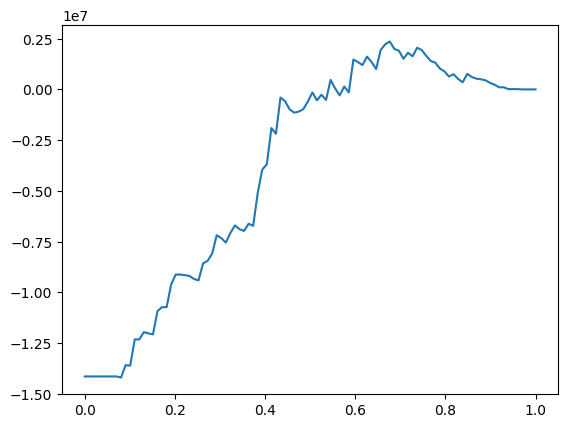

In [65]:
plt.plot(threshold_list, pnl_list)

In [66]:
px.line(x=threshold_list, y=pnl_list)

In [67]:
pnl_df = pd.DataFrame({'threshold': threshold_list, 'pnl': pnl_list}).sort_values(by='pnl', ascending=False)
pnl_df

,threshold,pnl
67,0.676768,2360764.26
66,0.666667,2224193.94
73,0.737374,2050674.48
68,0.686869,1994007.24
65,0.656566,1942621.92
...,...,...
1,0.010101,-14139705.24
6,0.060606,-14139705.24
7,0.070707,-14139705.24
0,0.000000,-14139705.24


In [68]:
pnl_df.sort_values(by='pnl', ascending=False).head(10)

,threshold,pnl
67,0.676768,2360764.26
66,0.666667,2224193.94
73,0.737374,2050674.48
68,0.686869,1994007.24
65,0.656566,1942621.92
74,0.747475,1939588.38
69,0.696970,1902834.00
71,0.717172,1804834.08
75,0.757576,1652720.76
72,0.727273,1634189.40


In [69]:
def analyse_pnl(taux = 0.04, default_rate = 1 ):


    threshold_list = np.linspace(0, 1, 100)
    pnl_list = []

    for threshold in threshold_list:
        v = 0
        for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
            v += calcul_pnl_one_complexe(m, y_true=y_true, y_pred_proba=y_pred_proba,threshold=threshold, default_rate=default_rate, taux=taux  )
        pnl_list.append(v)

fig = px.line(x=threshold_list, y=pnl_list)
fig.show()

In [70]:
analyse_pnl(taux=0.04, default_rate=1)

In [71]:
analyse_pnl(0.04, 0.25)

In [72]:
# pert que 25% de la somme
# taux interet = 0.03
analyse_pnl(0.025, 0.25)

In [73]:
# pert que 25% de la somme
# taux interet = 0.03
analyse_pnl(0.03, 0.25)

In [74]:
# SHAP VALUES

In [75]:
#Calculer le bénéfice sur l'intégralité du dataset = sur tous les clients
#Calculer le predict_proba